In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# import imutils

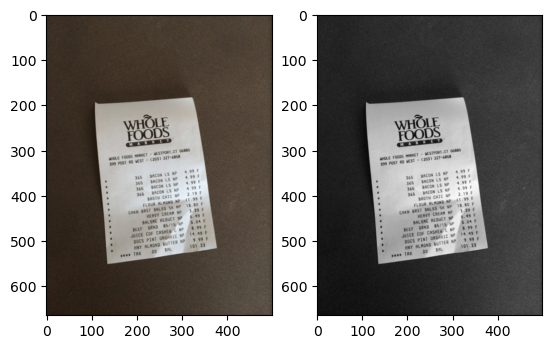

In [2]:
check_img = cv2.imread("./check.png")
gray_check_img = cv2.cvtColor(check_img, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.subplot(121)
plt.imshow(cv2.cvtColor(check_img, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(gray_check_img, cmap='gray')

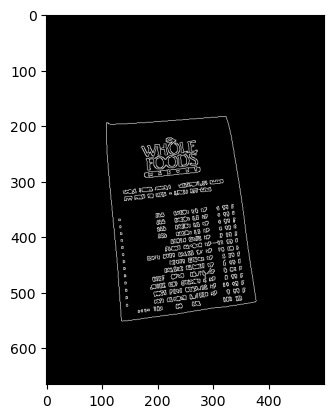

In [3]:
gray_img = cv2.GaussianBlur(gray_check_img, (3,3), 0)
gray_img = cv2.Canny(gray_img, 50, 200)
plt.imshow(gray_img, cmap="gray")

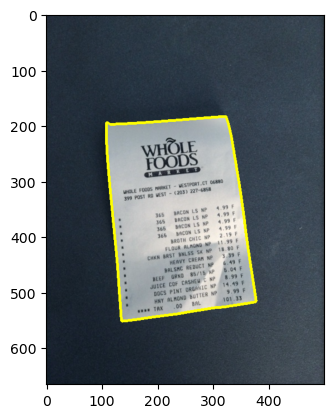

In [4]:
contours, _ = cv2.findContours(gray_img.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
max_area = 0
biggest_contour = None

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > max_area:
        max_area = area
        biggest_contour = cnt

cimg = check_img.copy()
cv2.drawContours(cimg, [biggest_contour], -1, (255,255,0), 3)
plt.imshow(cimg)



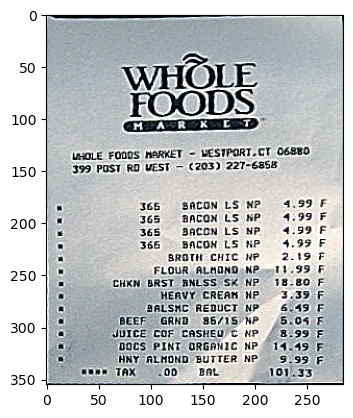

In [23]:
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")


    s = pts.sum(axis=1)
    rect[0] = list(map(int,pts[np.argmin(s)]))
    rect[2] = list(map(int,pts[np.argmax(s)]))


    # diff = np.squeeze(pts)
    diff = np.diff(pts, axis=1)
    rect[1] = list(map(int,pts[np.argmin(diff)]))
    rect[3] = list(map(int,pts[np.argmax(diff)]))

    return rect

approx = cv2.approxPolyDP(biggest_contour, 0.02 * cv2.arcLength(biggest_contour, True), True)
if len(approx) == 4:
    ordered_points = order_points(approx.reshape(4,2))
    (w, h) = (285, 355)
    destination_points = np.array([
        [0,0],
        [w-1, 0],
        [w - 1, h - 1],
        [0, h - 1]], dtype="float32")
    
    M = cv2.getPerspectiveTransform(ordered_points, destination_points)
    warped = cv2.warpPerspective(check_img.copy(), M, (w, h))


    #sharpening 
    sharpening_kernel = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])
    
    warped = sharpened_image = cv2.filter2D(warped, -1, sharpening_kernel)

    plt.imshow(warped)


# cv2.rectangle(check_img, list(map(int,ordered_points[0])), list(map(int,ordered_points[3])), (255,0,0), 3)

# plt.imshow(check_img)